In [1]:
from tilepy.include.ObservationScheduler import getdate, GetUniversalSchedule
from tilepy.include.PointingTools import ObservationParameters
import time
import argparse
import os

/Users/hashkar/anaconda3/envs/tilepy/lib/python3.11/site-packages/ligo/lw/lsctables.py:89: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal
/Users/hashkar/anaconda3/envs/tilepy/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Sets of inputs needed to run the code 

In [2]:
# Type of followup, options: gbm, gbmpng or gw
alertType = 'gw'

# Path to the input datasets (where galaxy cat should be for GW case)
datasetDir = '../../dataset/'

# Path to the output folder
outDir = './output'

# Config file for the tiling scheduling
#cfgFile = '../obsConfig/FollowupParameters.ini'

# Galaxy catalog name (if no catalog is given, the approach will be 2D) only. Path is given in datasetDir 
galcatName = "Gladeplus.h5"

# Tiles already observed
pointingsFile = None

# Limit on skyloc to perform a followup
locCut = None

Please choose one of the following maps, dates and obseratory arrays to launch the scheduler
- The url to the FITS file with the sky localization, e.g.for GW https://urlpath/Bayestar.fits.gz'
- Date and time of the event in format YYYY-MM-DD HH:MM:SS. You can use 2023-07-15 14:30:10 for the example .fits file
- Observatory array as a list

In [3]:
#GW follow-up: Multi-observatory campaign from the Northern and Southern hemisphere using the FoV-integrated 3-dimensional strategy
url = 'https://dcc.ligo.org/public/0119/P1500071/007/927563_lalinference.fits.gz'
obsTime = getdate("2023-03-15 20:51:47")
ObsArray = ['CTAN', 'CTAS']

In [4]:
#Very poorly localized Fermi-GBM GRB: Multi-telescope campaign at one site
url = 'https://heasarc.gsfc.nasa.gov/FTP/fermi/data/gbm/triggers/2023/bn231012231/quicklook/glg_healpix_all_bn231012231.fit'
obsTime = getdate("2023-10-12 20:42:18")
ObsArray = ['LST1', 'LST2','LST3','LST4']

In [10]:
#IPN GRB follow-up: Single narrow FoV radio telescope in the Southern Hemisphere
url = 'https://www.ioffe.ru/LEA/ShortGRBs_IPN/data/20120612T59382/GRB20120612_T59382_IPN_map_hpx.fits.gz'
obsTime = getdate("2017-08-17 10:30:10")
ObsArray = ['ATCA']

In [8]:
#GW follow-up: Multi optical observatory campaign around the globe
url = 'https://gracedb.ligo.org/api/superevents/S190814bv/files/LALInference.v1.fits.gz'
obsTime = getdate("2023-09-15 01:30:10")
ObsArray = ['ESO', 'ESO2', 'LP','LPL', 'OHP', 'SA', 'HA']

Proceed with each cell 

In [5]:
# Config file for the tiling scheduling are in ../obsConfig/
parameters = []
for i in ObsArray:
    parameters.append("../config/FollowupParameters_%s.ini" % i)
print("===========================================================================================")
print('parameters', parameters)
obsparameters = []

parameters ['../config/FollowupParameters_LST1.ini', '../config/FollowupParameters_LST2.ini', '../config/FollowupParameters_LST3.ini', '../config/FollowupParameters_LST4.ini']


In [6]:
for j in range(len(parameters)):
    obspar = ObservationParameters()
    obspar.add_parsed_args(url, obsTime, datasetDir, galcatName, outDir, pointingsFile, alertType, locCut)
    obspar.from_configfile(parameters[j])
    obsparameters.append(obspar)

Run the scheduling

https://heasarc.gsfc.nasa.gov/FTP/fermi/data/gbm/triggers/2023/bn231012231/quicklook/glg_healpix_all_bn231012231.fit
The filename is  glg_healpix_all_bn231012231.fit
curl https://heasarc.gsfc.nasa.gov/FTP/fermi/data/gbm/triggers/2023/bn231012231/quicklook/glg_healpix_all_bn231012231.fit -o glg_healpix_all_bn231012231.fit


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1549k  100 1549k    0     0   519k      0  0:00:02  0:00:02 --:--:--  519k


Is the hotspot in the galactic plane? False
Starting the 2D pointing calculation with the following parameters

Filename:  bn231012231
Date:  2023-10-12 20:42:18
Dataset:  ../../dataset/
Output:  ./output/bn231012231

obsparameters 4
Loading LVC HEALPix map from file: glg_healpix_all_bn231012231.fit
The total probability PGW:  0.8209
Observation Time UTC RA(deg) DEC(deg)  PGW   Round ObsName Duration FoV
-------------------- ------- -------- ------ ----- ------- -------- ---
 2023-10-12 20:42:18 29.8828  19.4712 0.0943     1    LST1       15 2.5
 2023-10-12 20:42:18 27.0703  15.7139 0.0661     1    LST2       15 2.5
 2023-10-12 20:42:18 32.6953   23.318 0.0646     1    LST3       15 2.5
 2023-10-12 20:42:18 25.3125  20.4236 0.0573     1    LST4       15 2.5
 2023-10-12 20:57:18 32.3438  15.4041 0.0591     1    LST1       15 2.5
 2023-10-12 20:57:18 34.4531   19.155 0.0533     1    LST2       15 2.5
 2023-10-12 20:57:18 27.7734  23.9695  0.049     1    LST3       15 2.5
 2023-10-12 20:5

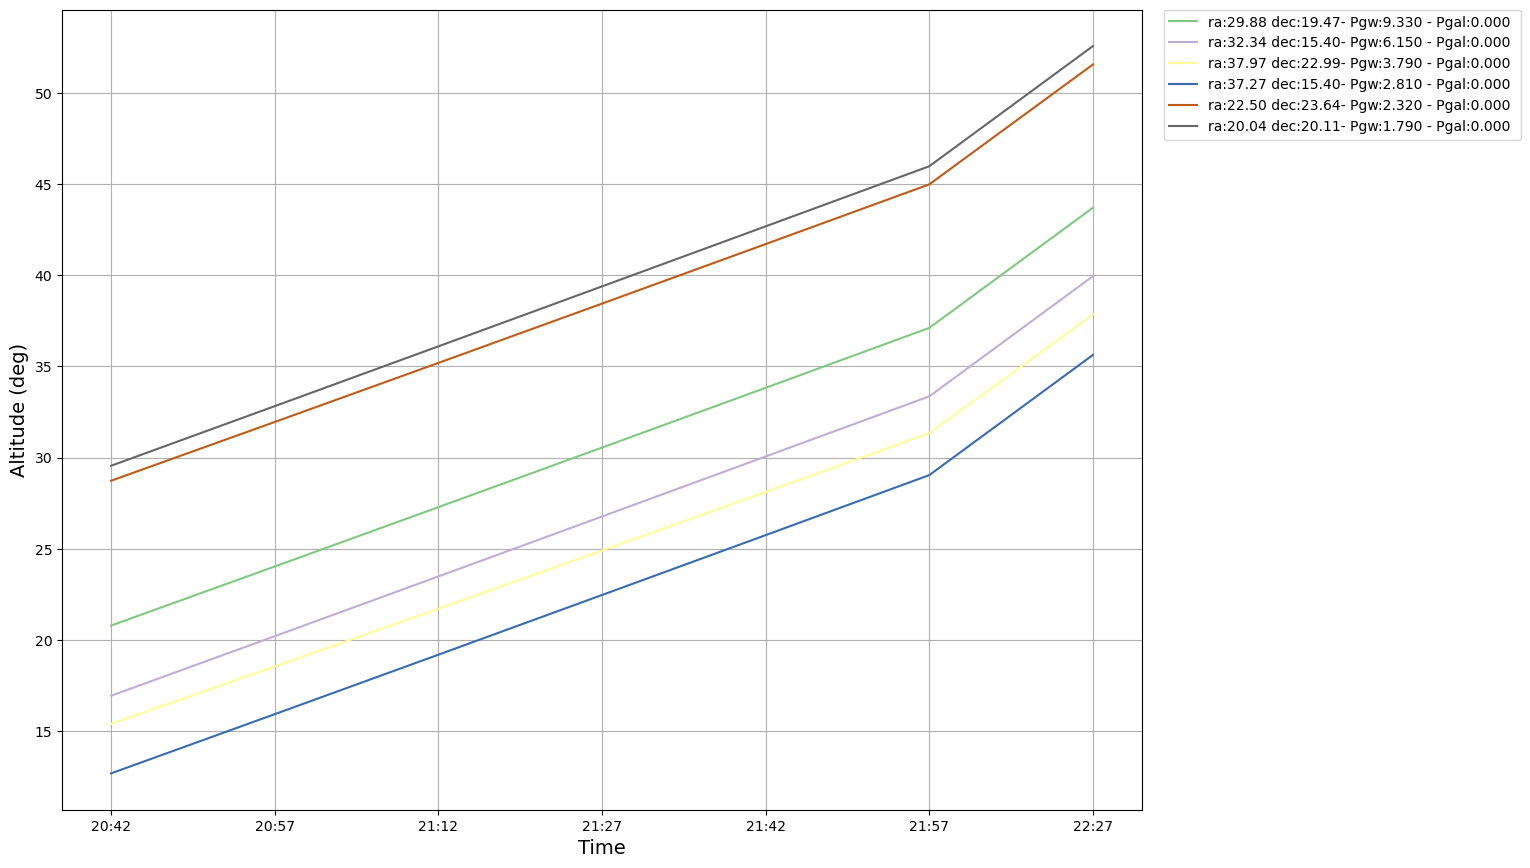

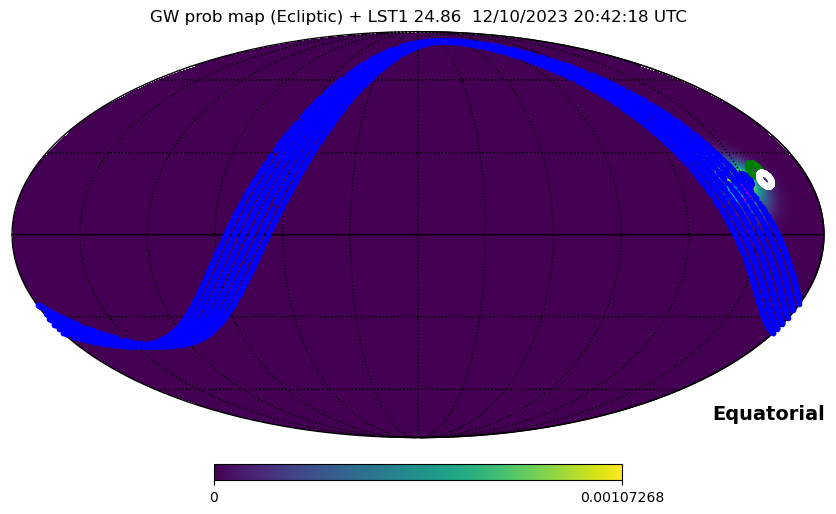

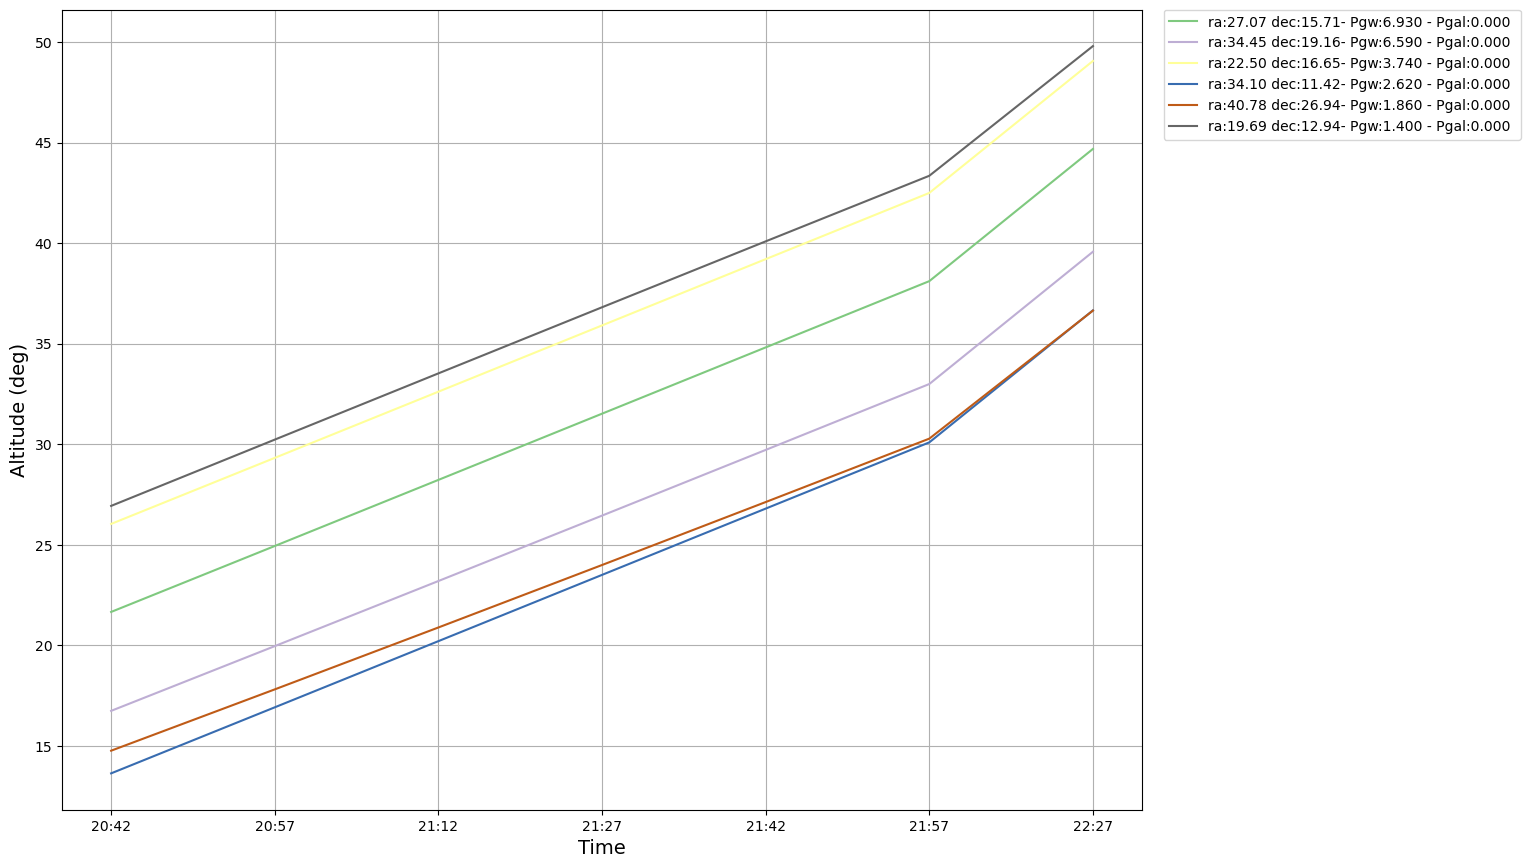

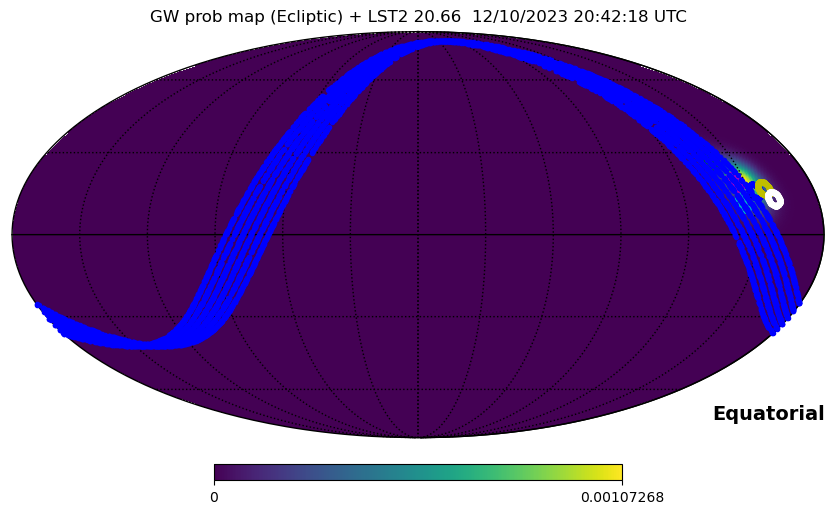

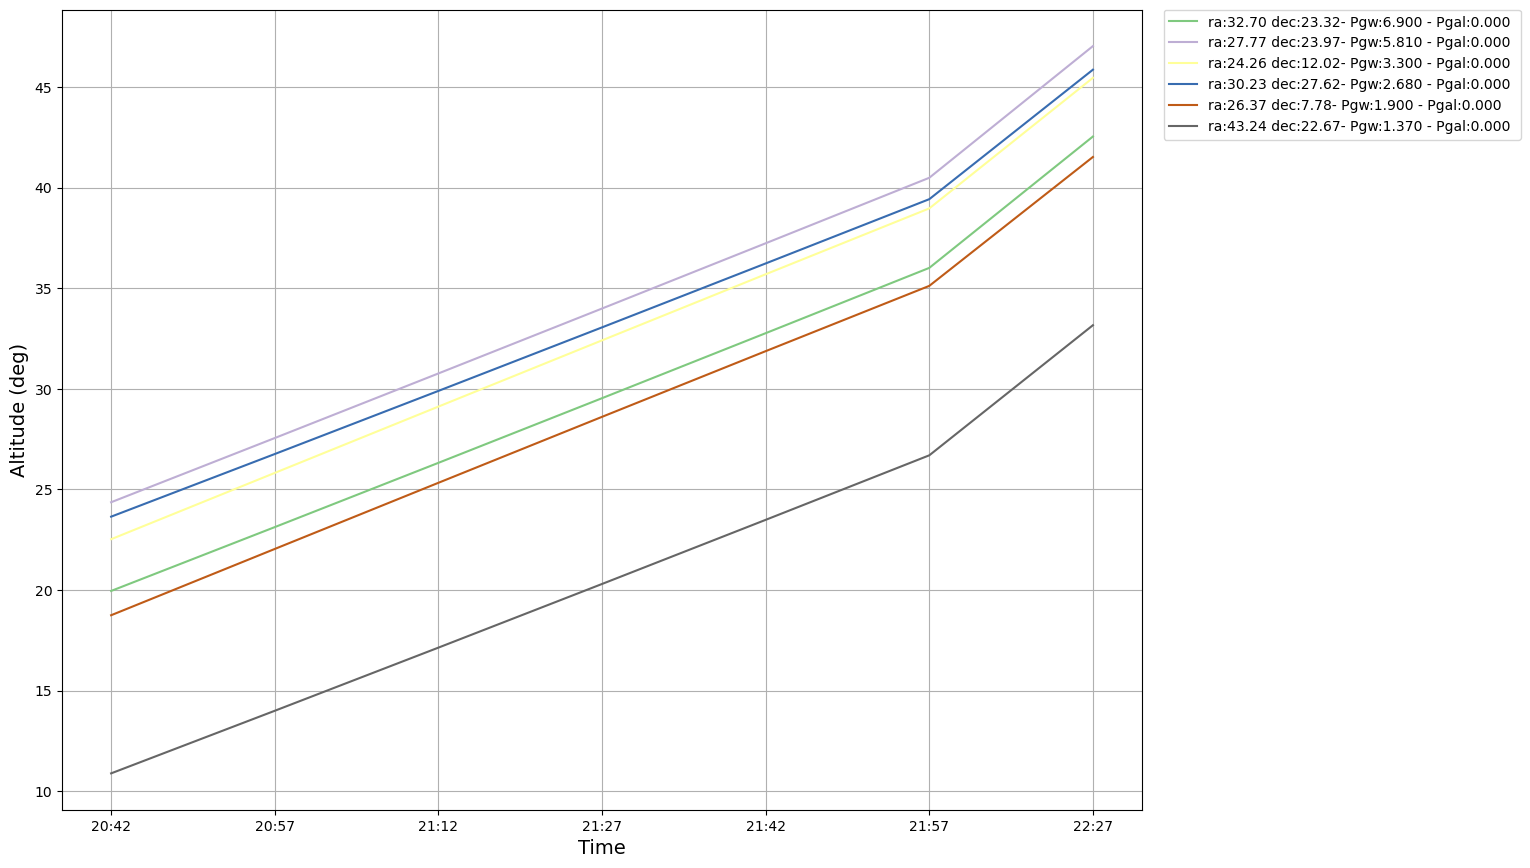

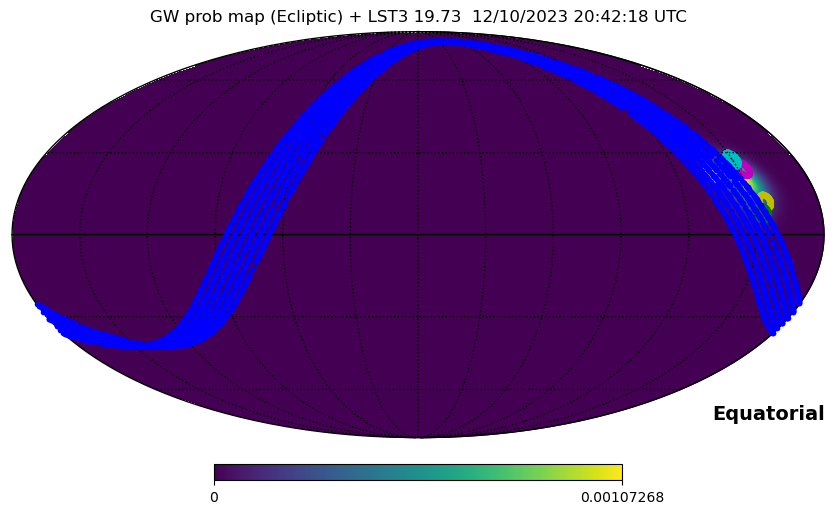

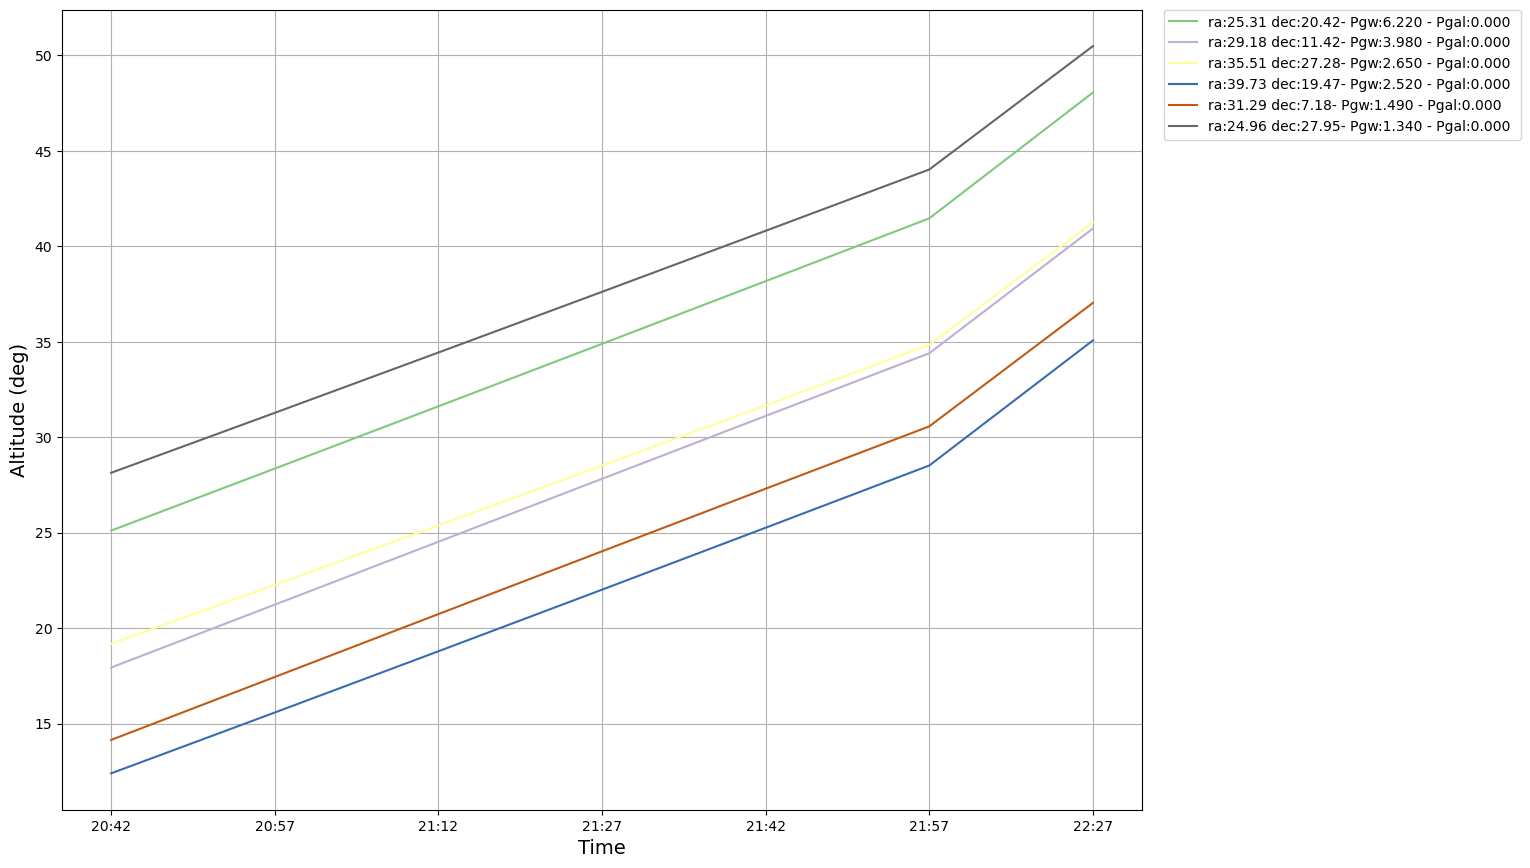

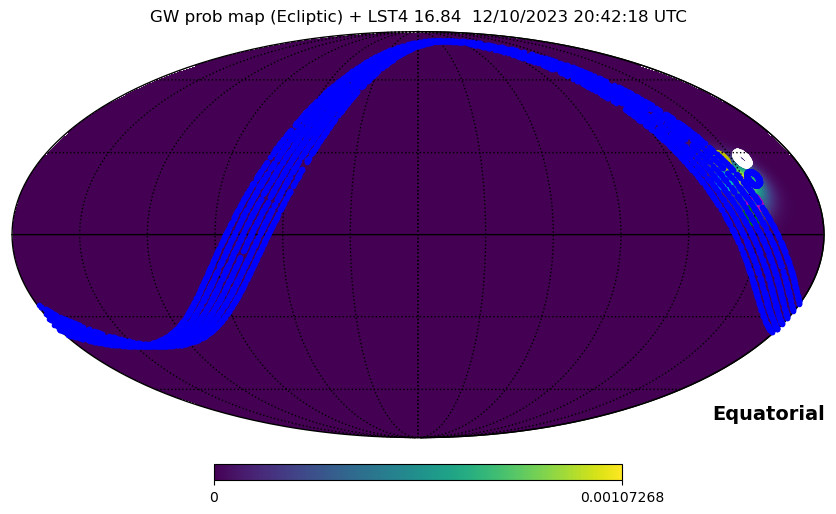

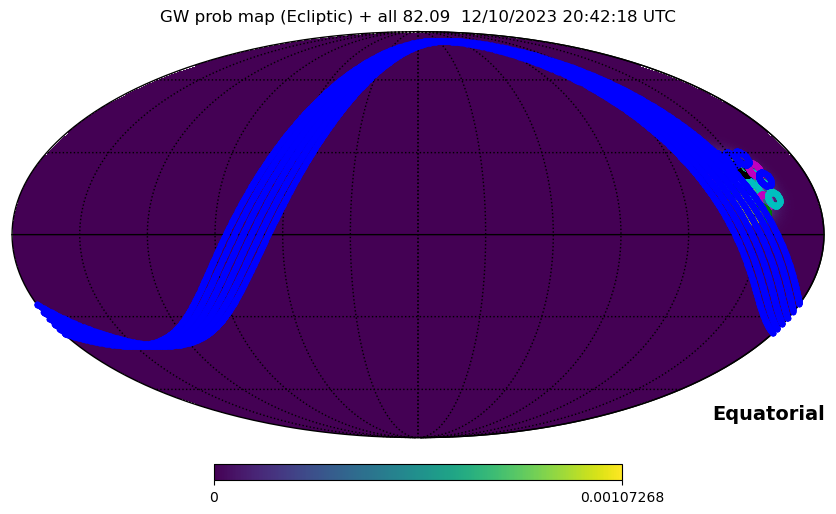

In [7]:
GetUniversalSchedule(obsparameters)